# E-Commerce Sales Analysis


## 📌 Objective
Analyze e-commerce transaction data to understand sales trends, top products, and customer behavior using Python.

## 📊 Dataset
- Online Retail Dataset (Kaggle)
- Contains invoice-level sales data of an online store
- Includes product, customer, price, date, and country details

## 🛠 Tools Used
- Python, Pandas, NumPy
- Matplotlib, Seaborn
- Scikit-learn (K-Means)
- Jupyter Notebook

## 🔄 Workflow
- Data cleaning and preprocessing
- Feature engineering (Total Sales, Month, Year)
- Sales trend and product analysis
- Customer segmentation using K-Means

## 🔑 Key Points
- Performed data cleaning and preprocessing on e-commerce sales data
- Created Total Sales feature for revenue analysis
- Analyzed monthly and yearly sales trends
- Identified top-selling products and countries
- Segmented customers using K-Means clustering
- Visualized insights using charts and plots


In [28]:
#Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")



In [29]:
df = pd.read_csv(
    "C:\\Users\\HP\\Downloads\\data.csv\\data.csv",
    encoding="ISO-8859-1"
)

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [30]:
#Understanding data
df.shape
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [31]:
#Data Cleaning
#REMOVE MISSING VALUES
df = df.dropna(subset=['CustomerID'])


In [32]:
#remove cancelled invoices
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]


In [33]:
#remove invalid quantity and price
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]


In [34]:
#Feature Engineering
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month


In [35]:
#Monthly sales Trend
monthly_sales = df.groupby('Month')['TotalSales'].sum()
monthly_sales


Month
1      569445.040
2      447137.350
3      595500.760
4      469200.361
5      678594.560
6      661213.690
7      600091.011
8      645343.900
9      952838.382
10    1039318.790
11    1161817.380
12    1090906.680
Name: TotalSales, dtype: float64

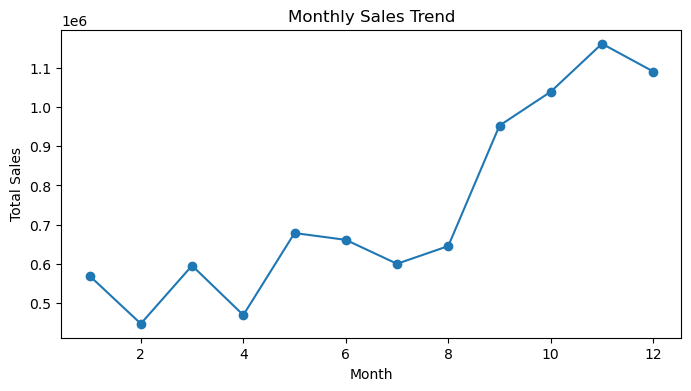

In [36]:
plt.figure(figsize=(8,4))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


In [37]:
#Yearly Sales Trends
yearly_sales = df.groupby('Year')['TotalSales'].sum()
yearly_sales

Year
2010     572713.890
2011    8338694.014
Name: TotalSales, dtype: float64

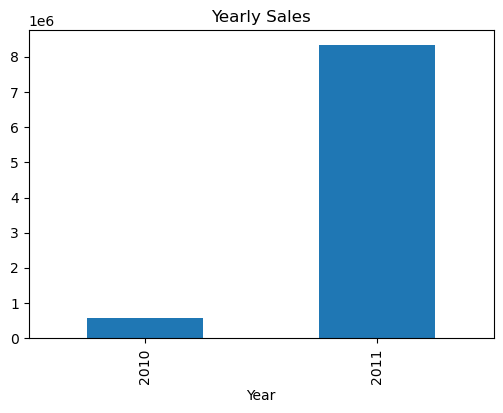

In [38]:
yearly_sales.plot(kind='bar', figsize=(6,4))
plt.title("Yearly Sales")
plt.show()

In [39]:
#Top 10 Products by revenue
top_products = (
    df.groupby('Description')['TotalSales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_products

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalSales, dtype: float64

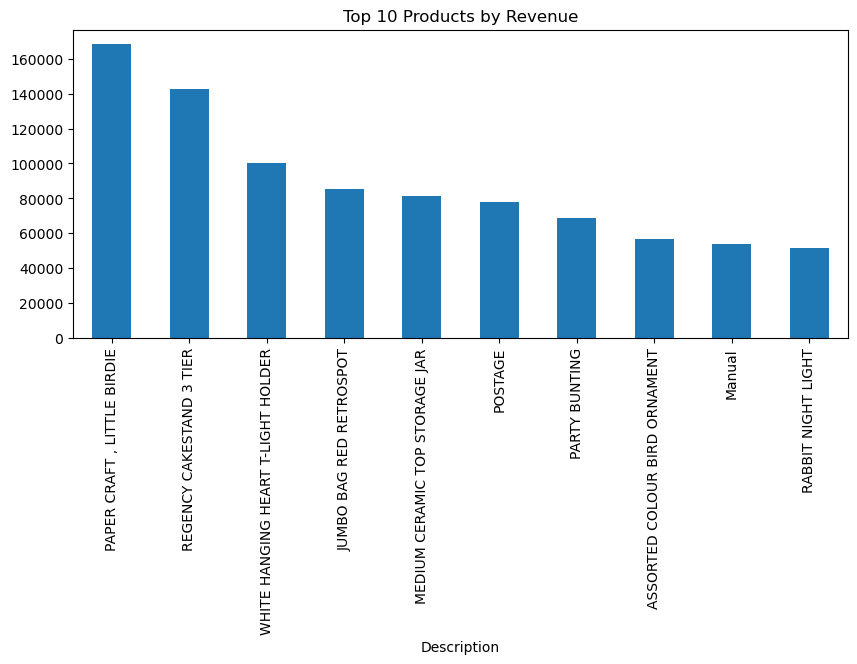

In [40]:
top_products.plot(kind='bar', figsize=(10,4))
plt.title("Top 10 Products by Revenue")
plt.show()


In [41]:
#Country wise sales
country_sales = (
    df.groupby('Country')['TotalSales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
country_sales


Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: TotalSales, dtype: float64

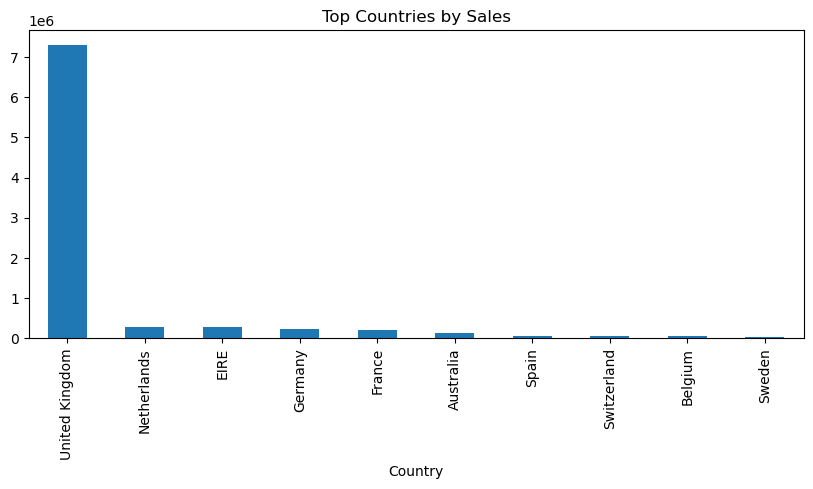

In [42]:
country_sales.plot(kind='bar', figsize=(10,4))
plt.title("Top Countries by Sales")
plt.show()

In [43]:
#Cistomer-Level Dataset
customer_df = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'Quantity': 'sum',
    'TotalSales': 'sum'
}).reset_index()

customer_df.columns = ['CustomerID', 'Frequency', 'TotalQuantity', 'TotalSpending']
customer_df.head()


,CustomerID,Frequency,TotalQuantity,TotalSpending
0,12346.0,1,74215,77183.60
1,12347.0,7,2458,4310.00
2,12348.0,4,2341,1797.24
3,12349.0,1,631,1757.55
4,12350.0,1,197,334.40


In [44]:
#Scaling Data (Required for K-Means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(
    customer_df[['Frequency', 'TotalQuantity', 'TotalSpending']]
)

In [45]:
#Find Number of Clusters (Elbow Method)
wcss = []

for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


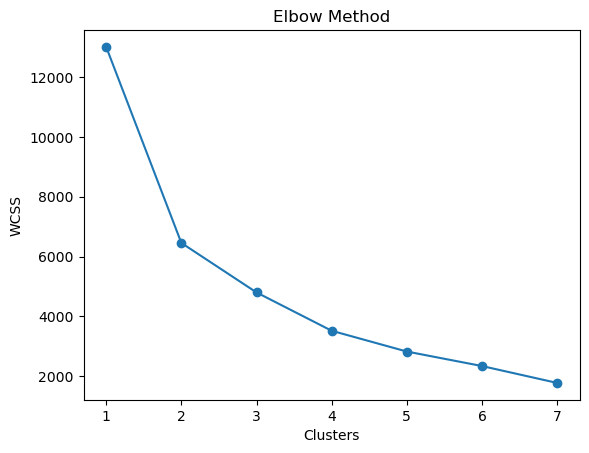

In [46]:
plt.plot(range(1,8), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

In [47]:
#Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(scaled_data)

In [48]:
#Analyze Customer Segments
customer_df.groupby('Cluster').mean()

,CustomerID,Frequency,TotalQuantity,TotalSpending
Cluster,,,,
0,15305.218422,3.072319,649.209382,1091.627050
1,15157.470588,70.352941,64501.000000,112694.244706
2,15224.710526,20.881579,6202.109649,11085.860658


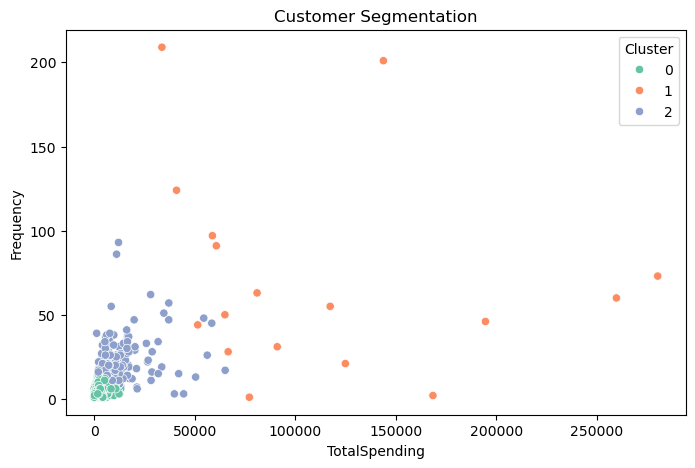

In [49]:
#Visualize Customer Segments
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=customer_df,
    x='TotalSpending',
    y='Frequency',
    hue='Cluster',
    palette='Set2'
)
plt.title("Customer Segmentation")
plt.show()

In [50]:
#Label the Clusters
cluster_map = {
    0: "Low Value Customers",
    1: "High Value Customers",
    2: "Medium Value Customers"
}

customer_df['CustomerType'] = customer_df['Cluster'].map(cluster_map)
customer_df.head()

,CustomerID,Frequency,TotalQuantity,TotalSpending,Cluster,CustomerType
0,12346.0,1,74215,77183.60,1,High Value Customers
1,12347.0,7,2458,4310.00,0,Low Value Customers
2,12348.0,4,2341,1797.24,0,Low Value Customers
3,12349.0,1,631,1757.55,0,Low Value Customers
4,12350.0,1,197,334.40,0,Low Value Customers


In [51]:
#Final Business Insights
customer_df['CustomerType'].value_counts()

CustomerType
Low Value Customers       4093
Medium Value Customers     228
High Value Customers        17
Name: count, dtype: int64